In [101]:
# Importing necessary libaries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [209]:
def extract_webpage(page):
    """
    This function takes the page number to extract content from indeed.co.uk page and returns the parsed web page
    """
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    url = f'https://uk.indeed.com/jobs?q=junior+data+scientist&l=London%2C+Greater+London&start={page}'
    print(url)
    req = requests.get(url,headers)
    #print(req.status_code)
    soup = BeautifulSoup(req.content,'lxml')
    return soup

def transform(soup):
    job_divs = soup.find_all('div',class_='job_seen_beacon')
    #print('Jobs_per_page: ',len(job_divs))
    for d in job_divs:
        job_title = d.find('h2', class_= "jobTitle").text
        #print(job_title)
        company_name = d.find('span',class_='companyName').text
        ##print(company_name)
        location = d.find('div', class_= "companyLocation").text
        #print(location)
        try:
            salary = d.find('span',class_ = 'salary-snippet').text
        except:
            salary = ' '
        #print(salary)
        job_summary = d.find('div', class_ = 'job-snippet').text.strip().replace('\n',' ')
        #print(job_summary)
        
        job_dict = {'Job_Title':job_title,
               'Comapny_Name':company_name,
               'Location':location,
               'Salary':salary,
               'Job_Summary':job_summary}
        #print(job_dict)
        job_list.append(job_dict)
    return     
    
    

In [218]:
job_list = []
for i in range(0,30,10):
    print(f'Getting page:{i}')
    c = extract_webpage(i)
    transform(c)
df = pd.DataFrame(job_list)
df

Getting page:0
https://uk.indeed.com/jobs?q=junior+data+scientist&l=London%2C+Greater+London&start=0
Getting page:10
https://uk.indeed.com/jobs?q=junior+data+scientist&l=London%2C+Greater+London&start=10
Getting page:20
https://uk.indeed.com/jobs?q=junior+data+scientist&l=London%2C+Greater+London&start=20


,Job_Title,Comapny_Name,Location,Salary,Job_Summary
0,Junior analyst and data scientist,Unwork.com,London SE1•Temporarily Remote,"£20,000 - £25,000 a year",Assisting with data collection process. You wi...
1,Jr. Data Scientist,The App Experts,United Kingdom•Temporarily Remote,"£25,000 - £35,000 a year",The focus will be on Data Scientist role and c...
2,Data Scientist,Michael Page UK,London,£300 - £400 a day,A collaborator who can work closely with the d...
3,newJunior Data Scientist,Grow Football,London SW8 3HE•Temporarily Remote,"£35,000 a year",Preparing and processing imaging data for sure...
4,Junior Data Scientist,Novafutur,London,,Being a data scientist would require the abili...
5,Junior Data Scientist,Greenlight Digital,London,"£25,000 a year",Data Wrangling/Cleaning – Retrieval and collec...
6,"Junior Data Scientist, Experian DataLabs",Experian,London•Remote,,"Developing tools for data processing, informat..."
7,ALEXANDER MCQUEEN Junior Data Scientist,Autumnpaper Limited,London,,The Junior Data Scientist will be working on d...
8,Junior Data Scientist,Tripledot Studios,London,,Develop and iterate on cutting-edge data pipel...
9,Junior Data Scientist - London,Echobox,London,,"Working knowledge of big data architectures, i..."


In [129]:
df.to_csv('Junior_Data_Scientist_Jobs.csv')

In [ ]:
# Building word cloud for Job_summary column

In [219]:
text = ' '
for row in df.Job_Summary:
    row_data = re.sub('[^a-zA-Z]',' ',row) # removing numbers and punctuations
    row_data = str(row).lower()
    tokens = row_data.split()
    tokens = [word for word in tokens if len(word)>=3]
    for i in tokens:
        text+=i+' '

In [220]:
text[:2000]

' assisting with data collection process. you will mainly working the back end the data side the business, collecting data, producing visualisations,… the focus will data scientist role and complete training will provided for the same. you will provide professional consulting services working onsite… collaborator who can work closely with the data scientist, designers and product manager build the best possible product for our customers. preparing and processing imaging data for sure model training. building and maintaining metrics data processing pipelines improve processes. being data scientist would require the ability analyse big data sets coming from heterogeneous producers both real time and offline, well apply… data wrangling/cleaning retrieval and collection open and closed data sources, including data processing, cleansing and verification help power our… developing tools for data processing, information retrieval and model development. analysing, processing, evaluating and do

Text(0.5, 1.0, 'Junior data scientist')

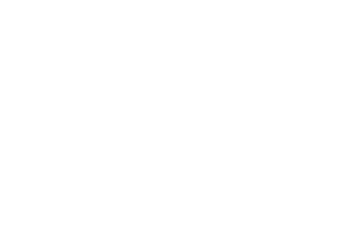

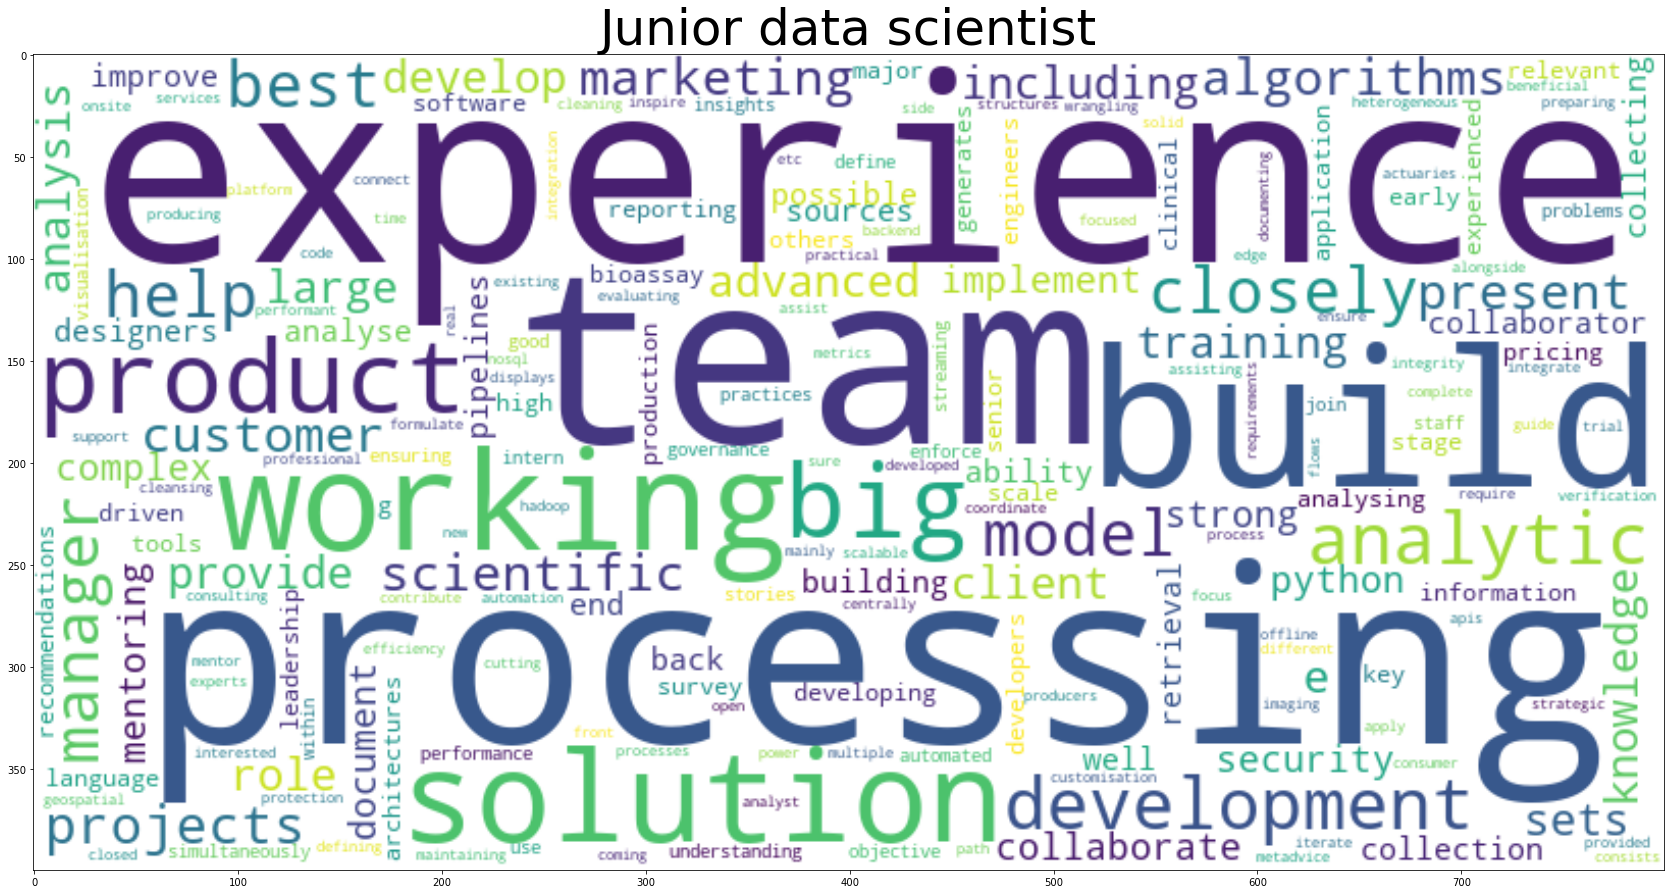

In [221]:
# Generate a word cloud image
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stop_words = ["data","scientist","scientists","skills","science","analysts","founders","business","junior","will","work","tell","using","part","need","see"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(30,15))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Junior data scientist",fontsize=50)